In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
from calculations.calculations import get_company_name
from datetime import timedelta

In [11]:
stock = yf.download('^SPX', period='3mo', interval='1h')
data = stock.tz_convert('CET')

[*********************100%%**********************]  1 of 1 completed


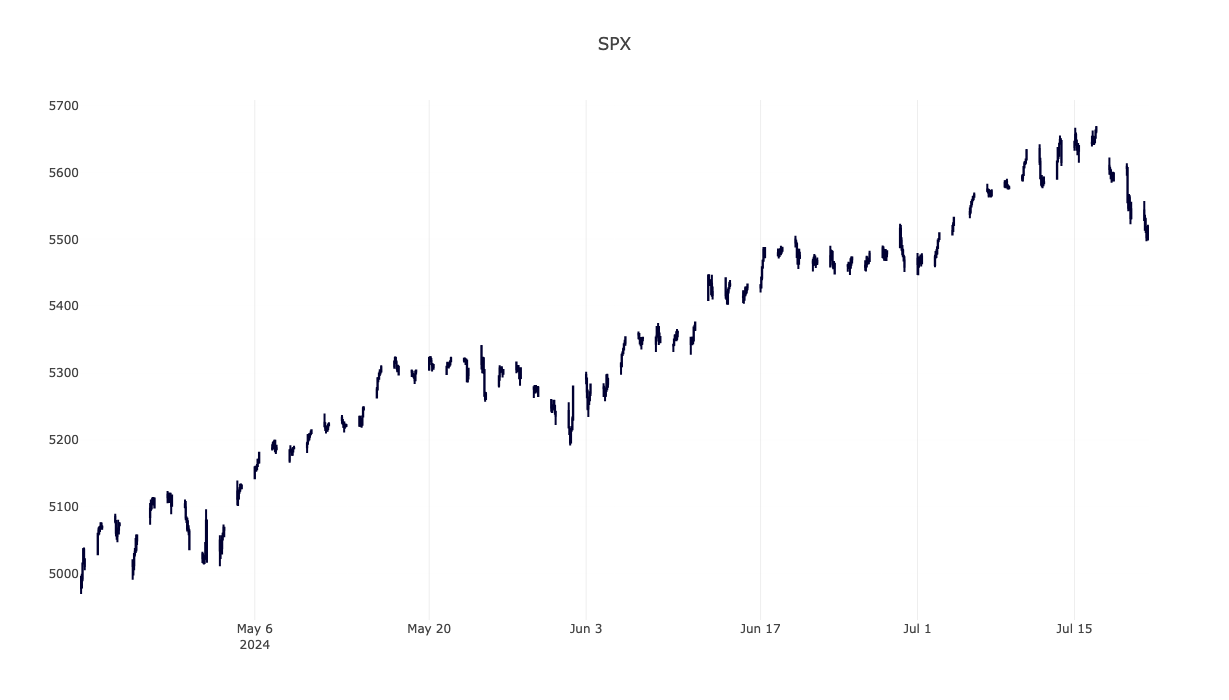

In [22]:
stock = yf.download('^SPX', period='3mo', interval='1h')
data = stock.tz_convert('CET')

data['Datetime'] = pd.to_datetime(data.index)

format = '%Y-%m-%d %H:%M'

fig = make_subplots(rows=1, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.05)

fig.add_trace(go.Candlestick(x=data.index,
                             open=data['Open'],
                             high=data['High'],
                             low=data['Low'],
                             close=data['Close'],
                             name='Candlestick'))


alldays = set(data['Datetime'].min() + timedelta(days=x) for x in range((data['Datetime'].max() - data['Datetime'].min()).days + 1))
missing = sorted(set(alldays) - set(data['Datetime']))

fig.update_xaxes(rangebreaks=[dict(values=missing)])

fig.update_layout(title=f'SPX', 
                  xaxis_title='', yaxis_title='',
                  yaxis=dict(
                            gridcolor='rgba(200, 200, 200, 0.03)',
                            gridwidth=1
                    ),
                  xaxis_rangeslider_visible=False,
                  height=700,
                  dragmode='drawline',
                  shapes=[],
                  newshape=dict(line=dict(color="red")),
                  modebar_add=['drawline','eraseshape'],
                  showlegend=False)

In [20]:
missing

[Timestamp('2024-04-27 15:30:00+0200', tz='CET'),
 Timestamp('2024-04-28 15:30:00+0200', tz='CET'),
 Timestamp('2024-05-04 15:30:00+0200', tz='CET'),
 Timestamp('2024-05-05 15:30:00+0200', tz='CET'),
 Timestamp('2024-05-11 15:30:00+0200', tz='CET'),
 Timestamp('2024-05-12 15:30:00+0200', tz='CET'),
 Timestamp('2024-05-18 15:30:00+0200', tz='CET'),
 Timestamp('2024-05-19 15:30:00+0200', tz='CET'),
 Timestamp('2024-05-25 15:30:00+0200', tz='CET'),
 Timestamp('2024-05-26 15:30:00+0200', tz='CET'),
 Timestamp('2024-05-27 15:30:00+0200', tz='CET'),
 Timestamp('2024-06-01 15:30:00+0200', tz='CET'),
 Timestamp('2024-06-02 15:30:00+0200', tz='CET'),
 Timestamp('2024-06-08 15:30:00+0200', tz='CET'),
 Timestamp('2024-06-09 15:30:00+0200', tz='CET'),
 Timestamp('2024-06-15 15:30:00+0200', tz='CET'),
 Timestamp('2024-06-16 15:30:00+0200', tz='CET'),
 Timestamp('2024-06-19 15:30:00+0200', tz='CET'),
 Timestamp('2024-06-22 15:30:00+0200', tz='CET'),
 Timestamp('2024-06-23 15:30:00+0200', tz='CET'),
